# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Laura Dooley 
### GitHub repo: https://github.com/Ldooley32/web-scraping-dooley



Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsons

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [13]:

# URL of the webpage to fetch
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the webpage
response = requests.get(url)

# Raise an error if the request fails
response.raise_for_status()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Convert the parsed HTML content to a string
html_content = str(soup)

# File name to save the HTML content
filename = "article.pkl"

# Save the HTML content to a .pkl file
with open(filename, 'wb') as f:
    pickle.dump(html_content, f)

print(f"HTML content successfully saved to {filename}")


HTML content successfully saved to article.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [16]:
# File path to the saved HTML content
file_path = "article.pkl"

# Load the HTML content from the .pkl file
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Locate the specific div containing the article content
article = soup.find('div', class_='entry-content')

# Extract and print the plain text from the article, if found
text_only = article.get_text(separator="\n").strip() if article else "Content not found"
print(text_only)


When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.


Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!




Laser Headlights?!


BWM’s prototype laser headlight assemblies undergoing testing.


The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work i

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [19]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(text_only)

# Filter tokens: remove punctuation, stopwords, and whitespace
filtered_tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Tokens and Their Frequencies:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens and Their Frequencies:
Token: 'laser', Frequency: 30
Token: 'headlights', Frequency: 17
Token: 'technology', Frequency: 10
Token: 'headlight', Frequency: 10
Token: 'led', Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [21]:


# Filter tokens: remove punctuation, stopwords, and whitespace, keeping lemmatized forms
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequencies
lemma_counts = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Lemmas and Their Frequencies:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas and Their Frequencies:
Lemma: 'laser', Frequency: 35
Lemma: 'headlight', Frequency: 26
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [ ]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Method to score sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Get the word list lowe case word (excluding punctuation and spaces)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count how many interesting tokens appear in the sentence
    token_count = sum(1 for word in words if word in interesting_tokens)
    
    # Return the ratio of interesting tokens to total words in the sentence
    return token_count / len(words) if words else 0

# Method to score sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Get the lemma list in sentence (excluding punctuation and spaces)
    lemmata = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for lemma in lemmata if lemma in interesting_lemmas)
    
    # Return the ratio of interesting lemmas to total words in the sentence
    return lemma_count / len(lemmata) if lemmata else 0

interesting_tokens = ["laser", "headlights", "technology", "headlight", "led"]

interesting_lemmas = ["laser", "headlight", "beam", "technology", "led"]

sentences = [sent.text.strip() for sent in doc.sents]

first_sentence = sentences [0]

token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print(f"First sentence: '{first_sentence}'")
print(f"Token score: {token_score}")
print(f"Lemma score: {lemma_score}")



First sentence: 'When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.'
Token score: 0.09523809523809523
Lemma score: 0.09523809523809523


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

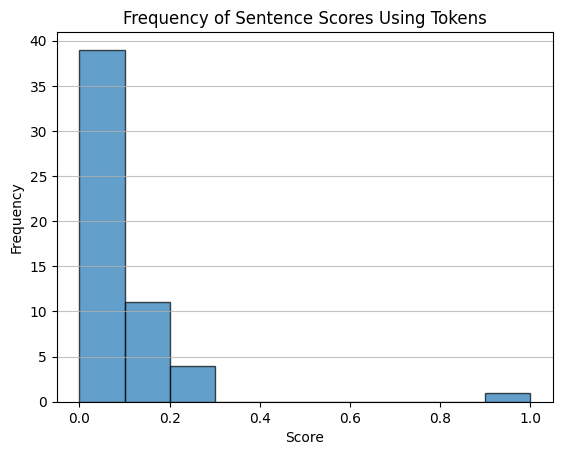

In [24]:
# Process the text into sentences
doc = nlp(text_only)
sentences = [sent.text.strip() for sent in doc.sents]

# Calculate scores for each sentence
sentence_scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)  
plt.title("Frequency of Sentence Scores Using Tokens")  
plt.xlabel("Score")  
plt.ylabel("Frequency")  
plt.grid(axis='y', alpha=0.75)  
plt.show()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

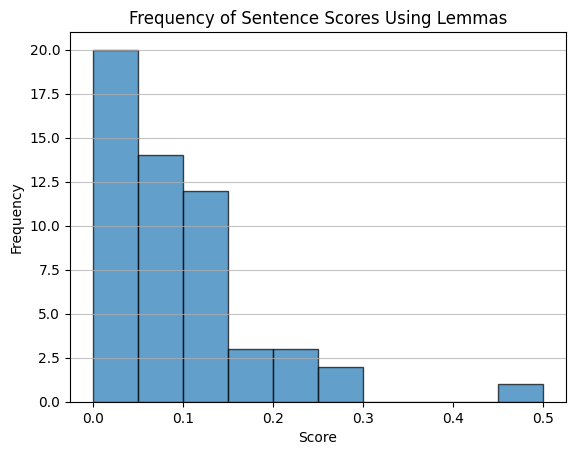

In [25]:
# Calculate scores for each sentence
lemma_sentence_scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plot the histogram
plt.hist(lemma_sentence_scores, bins=10, edgecolor='black', alpha=0.7)  
plt.title("Frequency of Sentence Scores Using Lemmas")  
plt.xlabel("Score")  
plt.ylabel("Frequency")  
plt.grid(axis='y', alpha=0.75)  
plt.show()


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

### To only include nouns code change:

Updated Code for Tokens:
#Filter out stop words, punctuation, whitespace, and include only nouns
tokens_nouns = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ["NOUN", "PROPN"]
]


#Filter out stop words, punctuation, whitespace, and include only nouns
lemmas_nouns = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ["NOUN", "PROPN"]
]

### If question 3 called for 5 most frequent noun tokens 

In [26]:
#Filter out stop words, punctuation, whitespace, and include only nouns
tokens_nouns = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ["NOUN", "PROPN"]
]
# Count token frequencies
token_counts = Counter(tokens_nouns)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Tokens and Their Frequencies:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens and Their Frequencies:
Token: 'laser', Frequency: 30
Token: 'headlights', Frequency: 17
Token: 'technology', Frequency: 10
Token: 'headlight', Frequency: 9
Token: 'beam', Frequency: 7


### If question 4 called for 5 most frequent noun lemmas 

In [27]:
#Filter out stop words, punctuation, whitespace, and include only nouns
lemmas_nouns = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ["NOUN", "PROPN"]
]

# Count lemma frequencies
lemma_counts = Counter(lemmas_nouns)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Lemmas and Their Frequencies:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas and Their Frequencies:
Lemma: 'laser', Frequency: 35
Lemma: 'headlight', Frequency: 25
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


In [28]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 380122 bytes to web-scraping.html
